In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Manifold learning for Visualisation

In [4]:
file_path = 'sample_data/clean_v1_mxmh_survey_results (1).xlsx'
data = pd.read_excel(file_path)

In [5]:
data

ID Form            Timestamp  Age Primary streaming service  \
0          1   8/27/2022 21:28:18   18                   Spotify   
1          2   8/27/2022 21:40:40   61             YouTube Music   
2          3   8/27/2022 21:54:47   18                   Spotify   
3          4   8/27/2022 21:56:50   18                   Spotify   
4          5   8/27/2022 22:00:29   18             YouTube Music   
..       ...                  ...  ...                       ...   
706      712  10/30/2022 14:37:28   17                   Spotify   
707      713  2022-01-11 22:26:42   18                   Spotify   
708      714  2022-03-11 23:24:38   19   Other streaming service   
709      715  2022-04-11 17:31:47   19                   Spotify   
710      716  2022-09-11 01:55:20   29             YouTube Music   

     Hours per day While working Instrumentalist Composer         Fav genre  \
0              4.0            No              No       No  Video game music   
1              2.5           Yes              No      Yes              Jazz   
2              4.0           Yes              No       No               R&B   
3              5.0           Yes             Yes      Yes              Jazz   
4              3.0           Yes             Yes       No  Video game music   
..             ...           ...             ...      ...               ...   
706            2.0           Yes             Yes       No              Rock   
707            1.0           Yes             Yes       No               Pop   
708            6.0           Yes              No      Yes               Rap   
709            5.0           Yes             Yes       No         Classical   
710            2.0           Yes              No       No           Hip hop   

    Exploratory  ...  Frequency [Pop]  Frequency [R&B]  Frequency [Rap]  \
0            No  ...           Rarely            Never           Rarely   
1           Yes  ...        Sometimes        Sometimes            Never   
2           Yes  ...        Sometimes  Very frequently  Very frequently   
3           Yes  ...  Very frequently  Very frequently  Very frequently   
4           Yes  ...           Rarely           Rarely            Never   
..          ...  ...              ...              ...              ...   
706         Yes  ...  Very frequently            Never           Rarely   
707         Yes  ...  Very frequently            Never            Never   
708         Yes  ...        Sometimes        Sometimes        Sometimes   
709          No  ...            Never            Never            Never   
710         Yes  ...        Sometimes  Very frequently  Very frequently   

    Frequency [Rock] Frequency [Video game music] Anxiety Depression Insomnia  \
0             Rarely              Very frequently     7.0        7.0     10.0   
1              Never                        Never     9.0        7.0      3.0   
2              Never                       Rarely     7.0        2.0      5.0   
3    Very frequently                        Never     8.0        8.0      7.0   
4              Never                    Sometimes     4.0        8.0      6.0   
..               ...                          ...     ...        ...      ...   
706  Very frequently                        Never     7.0        6.0      0.0   
707        Sometimes                    Sometimes     3.0        2.0      2.0   
708           Rarely                       Rarely     2.0        2.0      2.0   
709            Never                    Sometimes     2.0        3.0      2.0   
710  Very frequently                       Rarely     2.0        2.0      2.0   

     OCD Music effects  
0    2.0     No effect  
1    3.0       Improve  
2    9.0       Improve  
3    7.0       Improve  
4    0.0       Improve  
..   ...           ...  
706  9.0       Improve  
707  5.0       Improve  
708  2.0       Improve  
709  1.0       Improve  
710  5.0       Improve  

[711 rows x 33 columns]

Encoding categorical variables is crucial for converting textual data into a numerical format, which is necessary for most statistical analyses and machine learning algorithms. It also enables relationships between categorical features and other numerical variables to be revealed and exploited.

In this case, two encoding methods were used:

1. **One-Hot** encoding for categorical variables (with no inherent order), transforming each category into a new binary column.
2. **Ordinal** encoding for ordinal variables (with an order or a limited number of categories), assigning a unique number to each category according to their order.

In [6]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
import numpy as np

Determine if a column in the dataframe is ordinal.
For simplicity, if the number of unique values is less than 10 and the values are strings, it's considered ordinal. Otherwise, it's nominal.

In [7]:
def is_ordinal(column):
    unique_values = data[column].unique()
    if len(unique_values) <= 10 and isinstance(unique_values[0], str):
        return True
    return False

In [8]:
categorical_columns = data.select_dtypes(include=['object']).columns

best_encoding_methods = {}

for column in categorical_columns:
    if column == 'Timestamp':
        continue
    if is_ordinal(column):
        best_encoding_methods[column] = 'Ordinal'
    else:
        best_encoding_methods[column] = 'One-Hot'

encoded_df = data.copy()


In [9]:
for column, method in best_encoding_methods.items():
    if method == 'One-Hot':
        # One-Hot encoding
        encoder = OneHotEncoder(sparse=False)
        one_hot_encoded = encoder.fit_transform(data[[column]])
        one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=[f"{column}_{cat}" for cat in encoder.categories_[0]])
        encoded_df = pd.concat([encoded_df, one_hot_encoded_df], axis=1).drop(column, axis=1)
    elif method == 'Ordinal':
        # Ordinal encoding
        encoder = OrdinalEncoder()
        encoded_df[column] = encoder.fit_transform(data[[column]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
best_encoding_methods

{'Primary streaming service': 'Ordinal',
 'While working': 'Ordinal',
 'Instrumentalist': 'Ordinal',
 'Composer': 'Ordinal',
 'Fav genre': 'One-Hot',
 'Exploratory': 'Ordinal',
 'Foreign languages': 'Ordinal',
 'Frequency [Classical]': 'Ordinal',
 'Frequency [Country]': 'Ordinal',
 'Frequency [EDM]': 'Ordinal',
 'Frequency [Folk]': 'Ordinal',
 'Frequency [Gospel]': 'Ordinal',
 'Frequency [Hip hop]': 'Ordinal',
 'Frequency [Jazz]': 'Ordinal',
 'Frequency [K pop]': 'Ordinal',
 'Frequency [Latin]': 'Ordinal',
 'Frequency [Lofi]': 'Ordinal',
 'Frequency [Metal]': 'Ordinal',
 'Frequency [Pop]': 'Ordinal',
 'Frequency [R&B]': 'Ordinal',
 'Frequency [Rap]': 'Ordinal',
 'Frequency [Rock]': 'Ordinal',
 'Frequency [Video game music]': 'Ordinal',
 'Music effects': 'Ordinal'}

In [11]:
encoded_df

ID Form            Timestamp  Age  Primary streaming service  \
0          1   8/27/2022 21:28:18   18                        4.0   
1          2   8/27/2022 21:40:40   61                        5.0   
2          3   8/27/2022 21:54:47   18                        4.0   
3          4   8/27/2022 21:56:50   18                        4.0   
4          5   8/27/2022 22:00:29   18                        5.0   
..       ...                  ...  ...                        ...   
706      712  10/30/2022 14:37:28   17                        4.0   
707      713  2022-01-11 22:26:42   18                        4.0   
708      714  2022-03-11 23:24:38   19                        2.0   
709      715  2022-04-11 17:31:47   19                        4.0   
710      716  2022-09-11 01:55:20   29                        5.0   

     Hours per day  While working  Instrumentalist  Composer  Exploratory  \
0              4.0            0.0              0.0       0.0          0.0   
1              2.5            1.0              0.0       1.0          1.0   
2              4.0            1.0              0.0       0.0          1.0   
3              5.0            1.0              1.0       1.0          1.0   
4              3.0            1.0              1.0       0.0          1.0   
..             ...            ...              ...       ...          ...   
706            2.0            1.0              1.0       0.0          1.0   
707            1.0            1.0              1.0       0.0          1.0   
708            6.0            1.0              0.0       1.0          1.0   
709            5.0            1.0              1.0       0.0          0.0   
710            2.0            1.0              0.0       0.0          1.0   

     Foreign languages  ...  Fav genre_Jazz  Fav genre_K pop  Fav genre_Latin  \
0                  1.0  ...             0.0              0.0              0.0   
1                  1.0  ...             1.0              0.0              0.0   
2                  0.0  ...             0.0              0.0              0.0   
3                  1.0  ...             1.0              0.0              0.0   
4                  1.0  ...             0.0              0.0              0.0   
..                 ...  ...             ...              ...              ...   
706                1.0  ...             0.0              0.0              0.0   
707                1.0  ...             0.0              0.0              0.0   
708                0.0  ...             0.0              0.0              0.0   
709                0.0  ...             0.0              0.0              0.0   
710                1.0  ...             0.0              0.0              0.0   

     Fav genre_Lofi  Fav genre_Metal  Fav genre_Pop  Fav genre_R&B  \
0               0.0              0.0            0.0            0.0   
1               0.0              0.0            0.0            0.0   
2               0.0              0.0            0.0            1.0   
3               0.0              0.0            0.0            0.0   
4               0.0              0.0            0.0            0.0   
..              ...              ...            ...            ...   
706             0.0              0.0            0.0            0.0   
707             0.0              0.0            1.0            0.0   
708             0.0              0.0            0.0            0.0   
709             0.0              0.0            0.0            0.0   
710             0.0              0.0            0.0            0.0   

     Fav genre_Rap  Fav genre_Rock  Fav genre_Video game music  
0              0.0             0.0                         1.0  
1              0.0             0.0                         0.0  
2              0.0             0.0                         0.0  
3              0.0             0.0                         0.0  
4              0.0             0.0                         1.0  
..             ...             ...             

### **1. Analyse the variables, by computing the correlations in order to detect the most important and explain your analysis**

<ipython-input-12-481404dc9f88>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_encoded = encoded_df.corr()


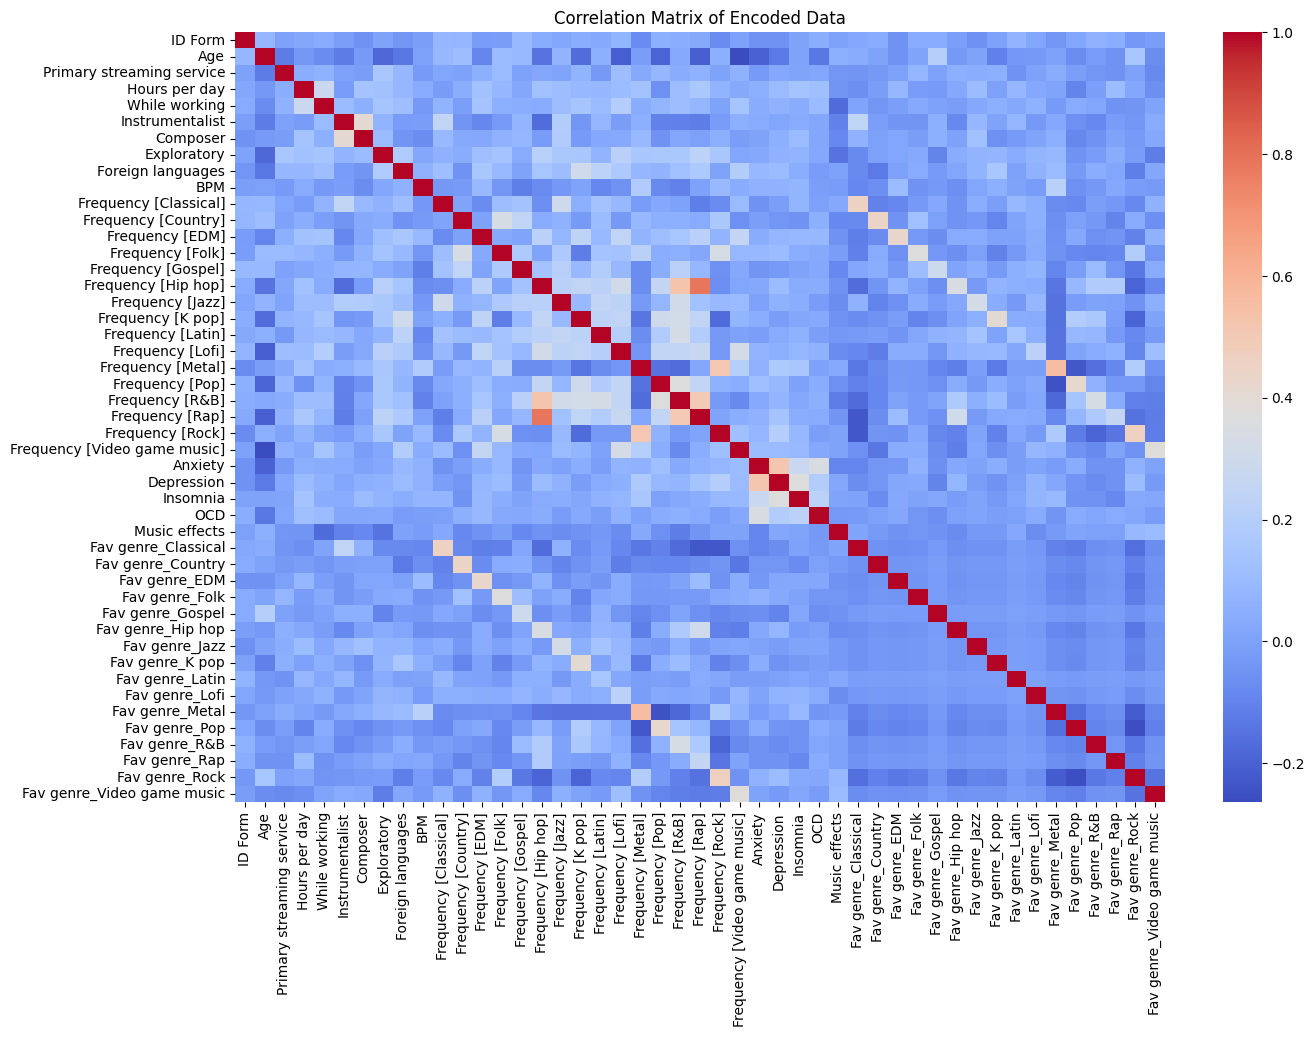

In [12]:
correlation_matrix_encoded = encoded_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_encoded, cmap='coolwarm')
plt.title("Correlation Matrix of Encoded Data")
plt.show()


Some key observations:

*   There is a strong correlation between **Frequency [Hip hop]** and **Frequency [Rap]** (correlation of 0.785). This suggests a potential redundancy between these two variables, which makes sense as Hip hop and Rap genres are often linked.

*   **Age** with **Anxiety** (-0.202): A moderate negative correlation, suggesting that anxiety may decrease with age.

*   **Frequency [Pop]** with **Anxiety (0.118)**: A slightly positive correlation, indicating a weak relationship between listening to pop music and anxiety.

*   **Frequency [Video game music]** with **Anxiety (0.103)**: A slightly positive correlation, suggesting a weak relationship between listening to video game music and anxiety.

*   **Anxiety** and **Depression** are strongly correlated with each other (0.521), in line with trends observed in psychology.




These results provide useful pointers for the next steps, including feature selection and the dimensionality reduction methods to be applied. They also help us to understand how the different variables relate to each other and to mental health indicators.

### **2. Apply different manifold learning (projections) approaches on the dataset by visualising the results in 2D or 3D. If possible, compute the errors.**

**Step 1:** Feature selection

Thanks to the next step, we noticed what needed to be used in step, and kept it:

In [13]:
selected_columns = ['Age', 'Hours per day', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects'] + [col for col in encoded_df if 'Fav genre_' in col]
data_for_manifold = encoded_df[selected_columns]

In [14]:
data_for_manifold

Age  Hours per day  Anxiety  Depression  Insomnia  OCD  Music effects  \
0     18            4.0      7.0         7.0      10.0  2.0            1.0   
1     61            2.5      9.0         7.0       3.0  3.0            0.0   
2     18            4.0      7.0         2.0       5.0  9.0            0.0   
3     18            5.0      8.0         8.0       7.0  7.0            0.0   
4     18            3.0      4.0         8.0       6.0  0.0            0.0   
..   ...            ...      ...         ...       ...  ...            ...   
706   17            2.0      7.0         6.0       0.0  9.0            0.0   
707   18            1.0      3.0         2.0       2.0  5.0            0.0   
708   19            6.0      2.0         2.0       2.0  2.0            0.0   
709   19            5.0      2.0         3.0       2.0  1.0            0.0   
710   29            2.0      2.0         2.0       2.0  5.0            0.0   

     Fav genre_Classical  Fav genre_Country  Fav genre_EDM  ...  \
0                    0.0                0.0            0.0  ...   
1                    0.0                0.0            0.0  ...   
2                    0.0                0.0            0.0  ...   
3                    0.0                0.0            0.0  ...   
4                    0.0                0.0            0.0  ...   
..                   ...                ...            ...  ...   
706                  0.0                0.0            0.0  ...   
707                  0.0                0.0            0.0  ...   
708                  0.0                0.0            0.0  ...   
709                  1.0                0.0            0.0  ...   
710                  0.0                0.0            0.0  ...   

     Fav genre_Jazz  Fav genre_K pop  Fav genre_Latin  Fav genre_Lofi  \
0               0.0              0.0              0.0             0.0   
1               1.0              0.0              0.0             0.0   
2               0.0              0.0              0.0             0.0   
3               1.0              0.0              0.0             0.0   
4               0.0              0.0              0.0             0.0   
..              ...              ...              ...             ...   
706             0.0              0.0              0.0             0.0   
707             0.0              0.0              0.0             0.0   
708             0.0              0.0              0.0             0.0   
709             0.0              0.0              0.0             0.0   
710             0.0              0.0              0.0             0.0   

     Fav genre_Metal  Fav genre_Pop  Fav genre_R&B  Fav genre_Rap  \
0                0.0            0.0            0.0            0.0   
1                0.0            0.0            0.0            0.0   
2                0.0            0.0            1.0            0.0   
3                0.0            0.0            0.0            0.0   
4                0.0            0.0            0.0            0.0   
..               ...            ...            ...            ...   
706              0.0            0.0            0.0            0.0   
707              0.0            1.0            0.0            0.0   
708              0.0            0.0            0.0            1.0   
709              0.0            0.0            0.0            0.0   
710              0.0            0.0            0.0            0.0   

     Fav genre_Rock  Fav genre_Video game music  
0               0.0                         1.0  
1               0.0                         0.0  
2               0.0                         0.0  
3               0.0                         0.0  
4               0.0                         1.0  
..              ...                         ...  
706             1.0                         0.0  
707             0.0                         0.0  
708             0.0                         0.0  
709             0.0                         0.0  
710    

**Step2:** Data standardization

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_for_manifold)


**Step3:** Applying different manifold learning techniques

**PCA**

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)


In [17]:
from sklearn.manifold import TSNE, LocallyLinearEmbedding

**TSNE**

In [18]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(normalized_data)

**LLE**

In [19]:
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
lle_result = lle.fit_transform(normalized_data)

**Visualizations**

In [20]:
results = {
    'PCA': pca_result,
    't-SNE': tsne_result,
    'LLE': lle_result
}

<ipython-input-21-e5065c82c34d>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(normalized_measures[measure])


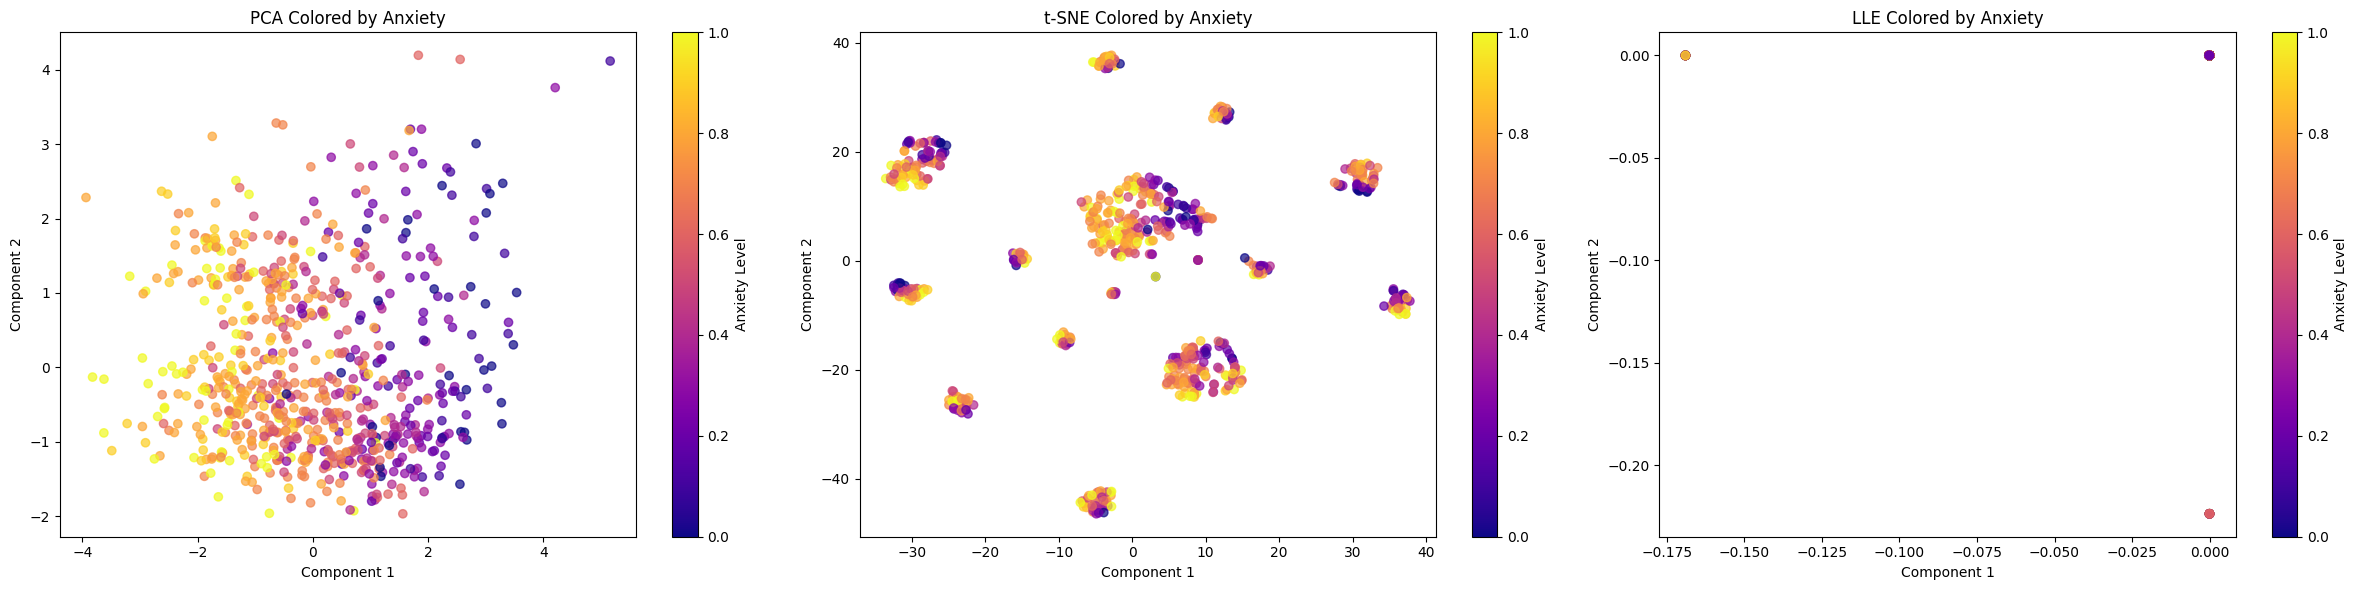

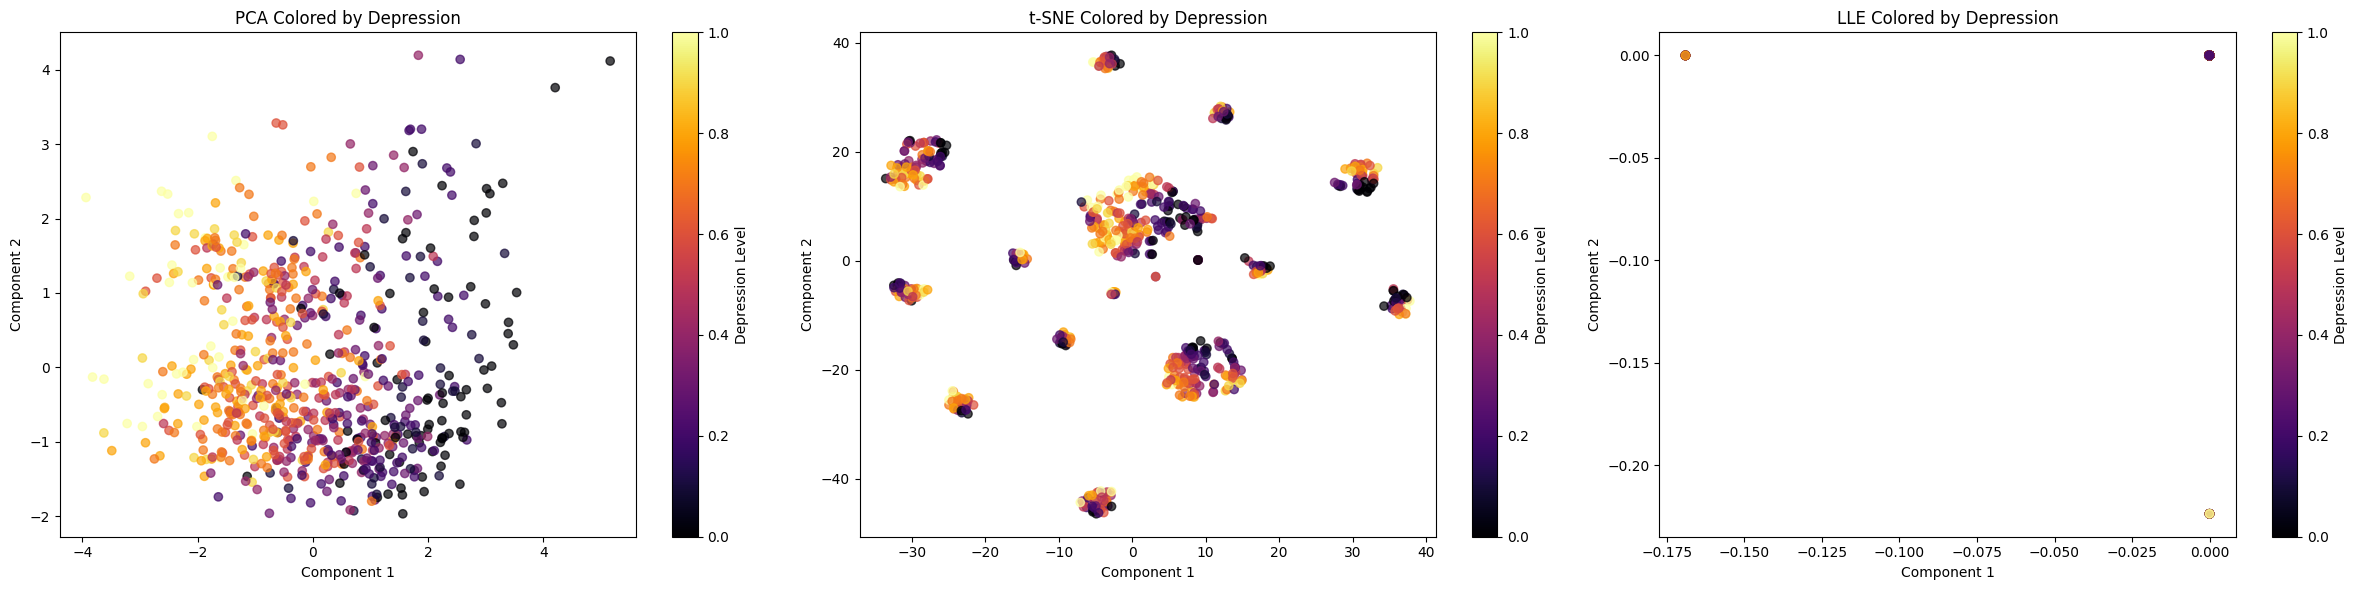

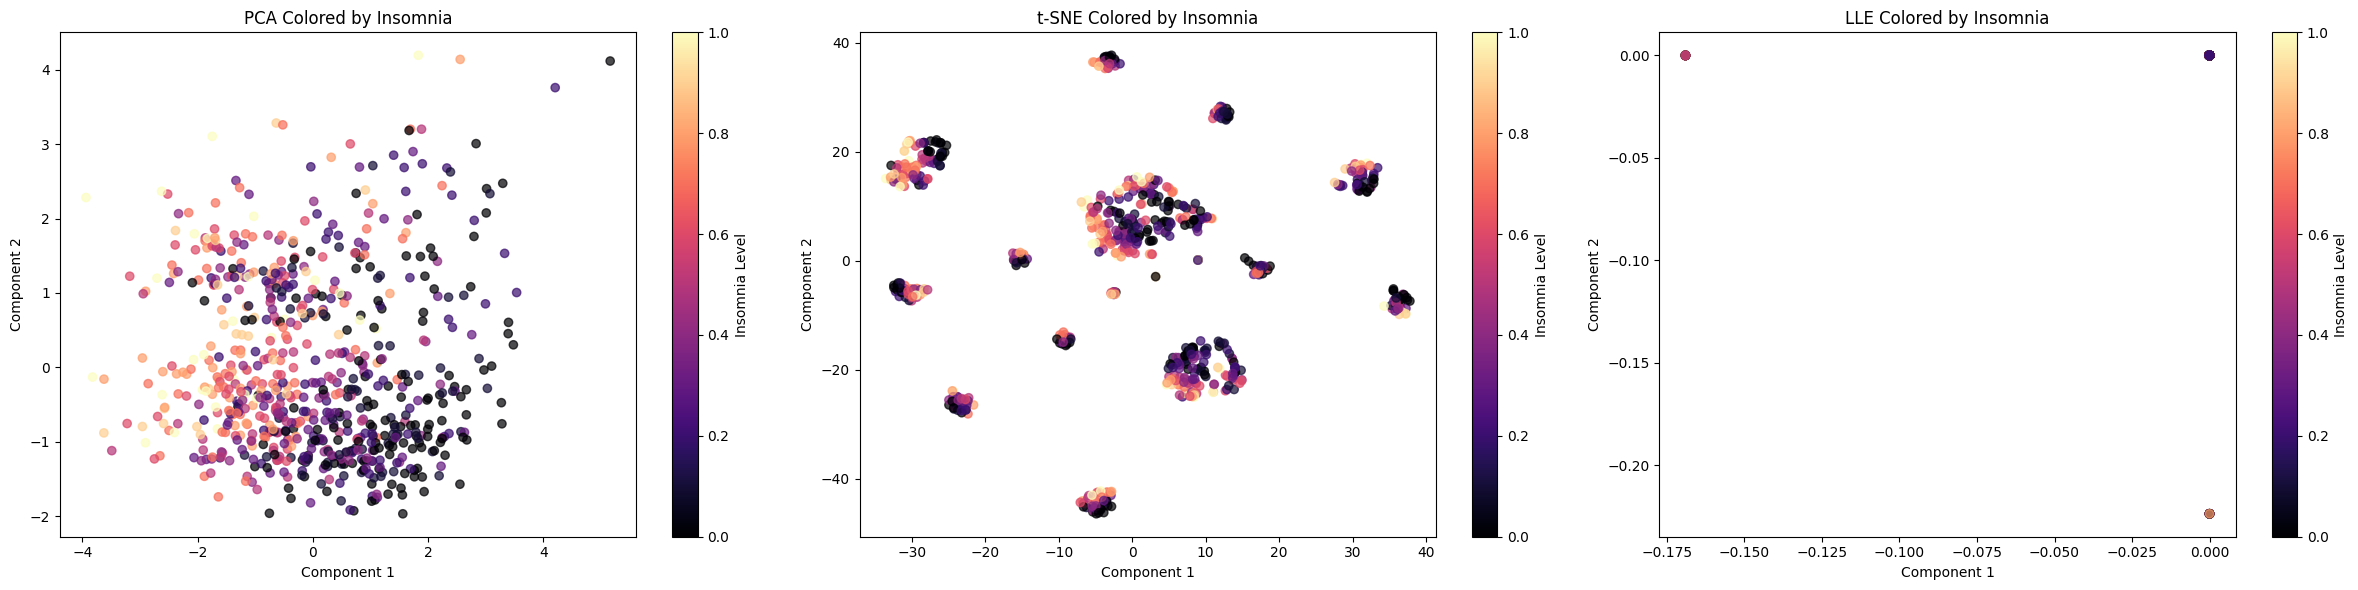

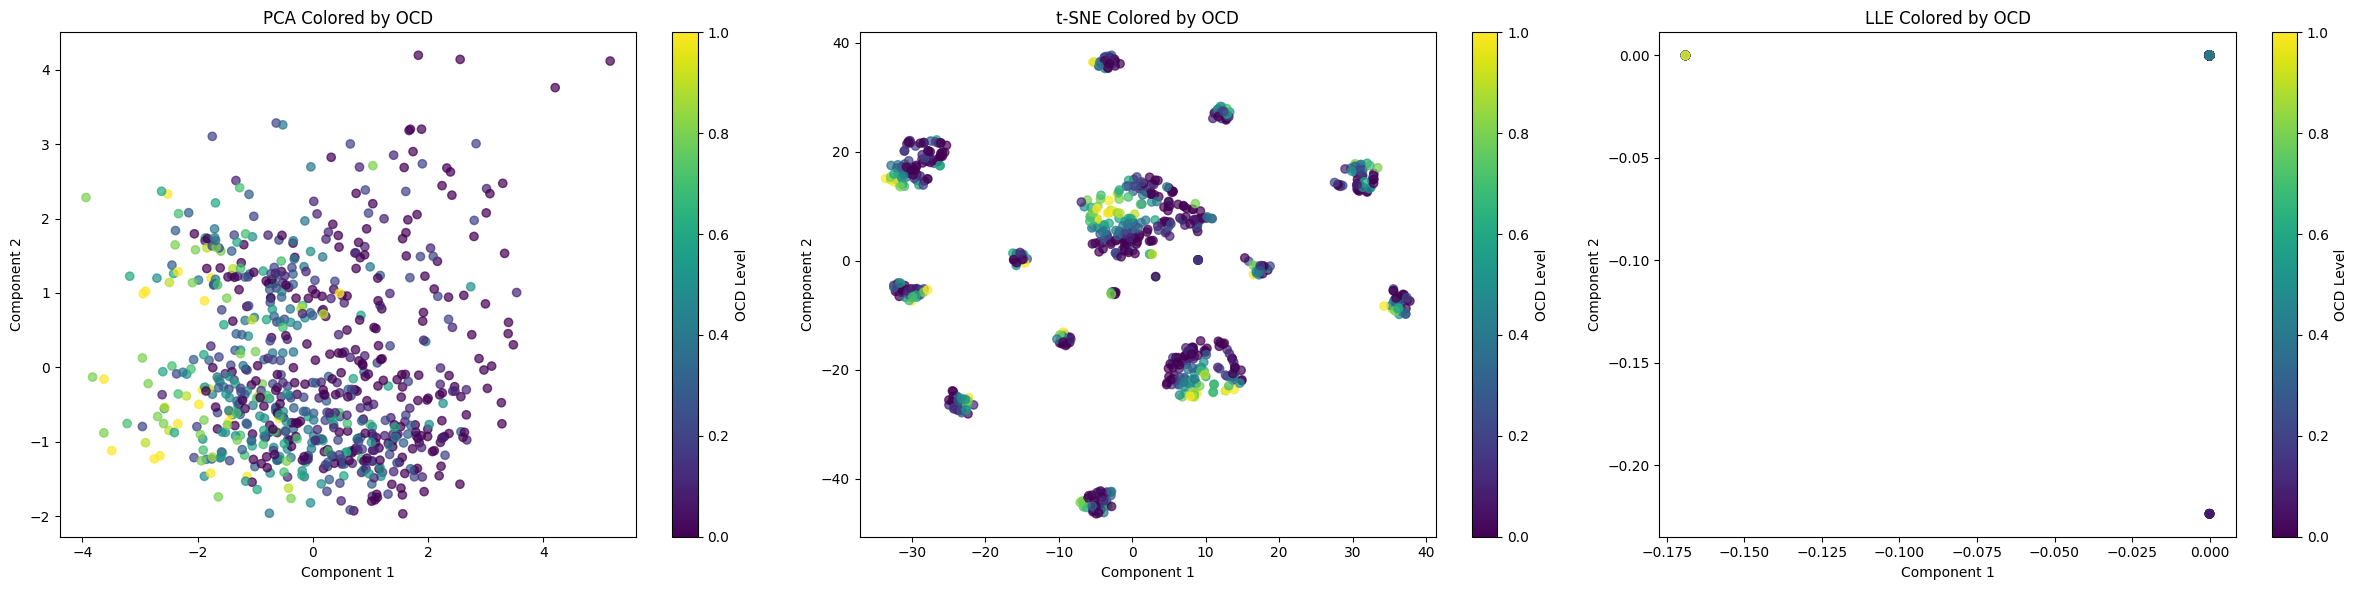

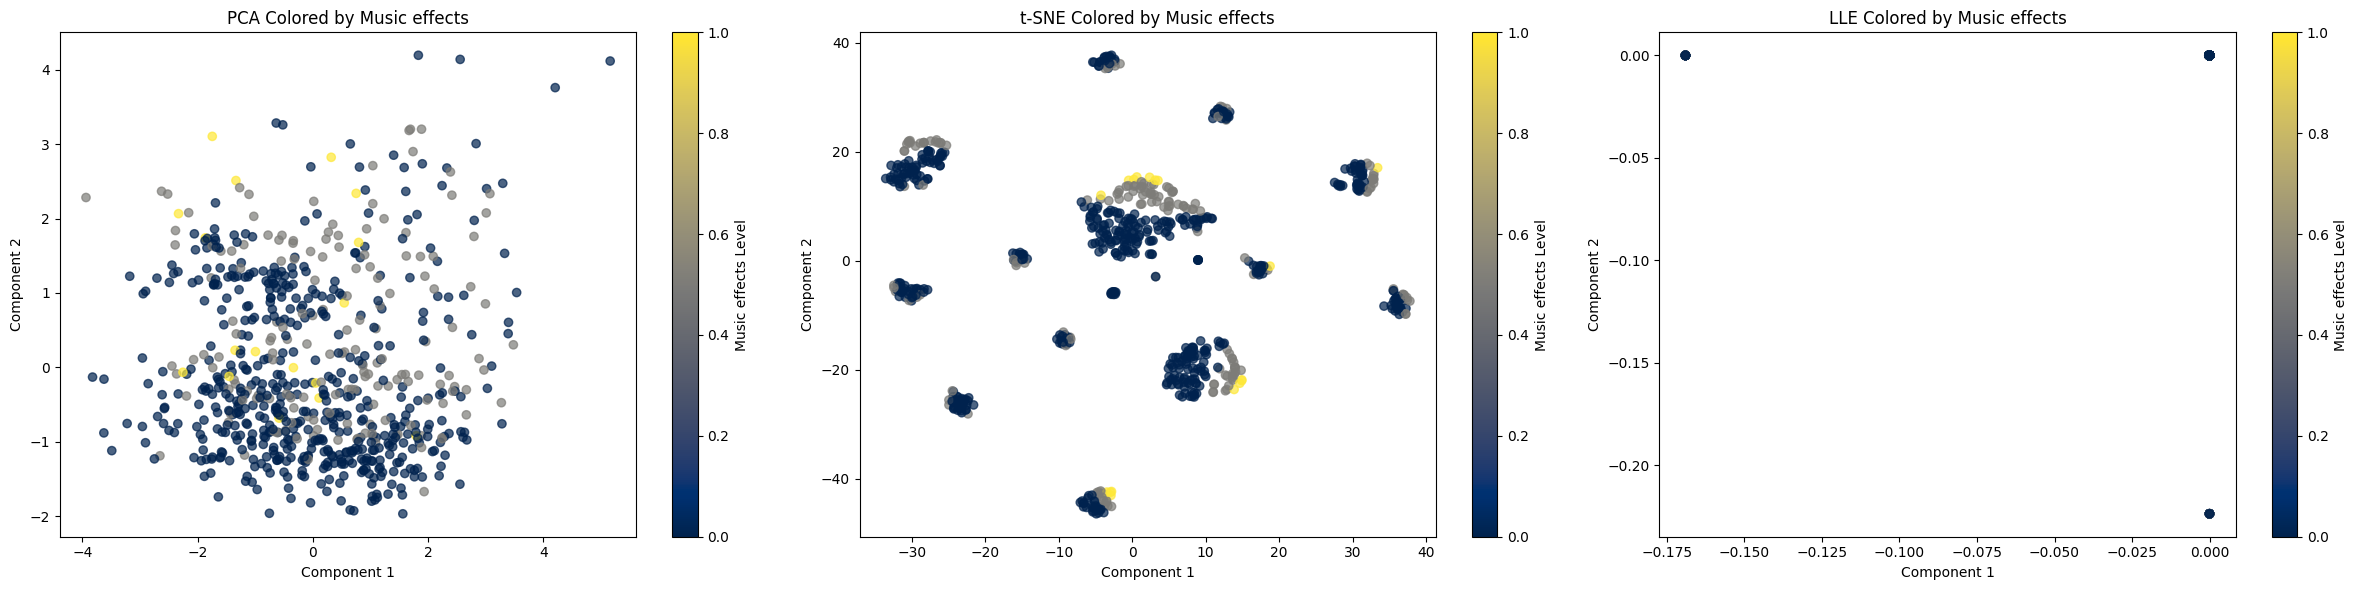

In [21]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

method_results = [pca_result, tsne_result, lle_result]
method_names = ['PCA', 't-SNE', 'LLE']

health_measures = ['Anxiety', 'Depression', 'Insomnia', 'OCD','Music effects']
normalized_measures = {}
color_maps = ['plasma', 'inferno', 'magma', 'viridis', 'cividis']


for measure in health_measures:
    normalized_measures[measure] = (encoded_df[measure] - encoded_df[measure].min()) / (encoded_df[measure].max() - encoded_df[measure].min())

for measure, cmap in zip(health_measures, color_maps):
    fig, axes = plt.subplots(1, len(method_results), figsize=(24, 6))
    colors = plt.cm.get_cmap(cmap)(normalized_measures[measure])

    for ax, result, method_name in zip(axes, method_results, method_names):
        sc = ax.scatter(result[:, 0], result[:, 1], alpha=0.7, c=colors)
        ax.set_title(f'{method_name} Colored by {measure}')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        fig.colorbar(ScalarMappable(Normalize(0, 1), cmap=cmap), ax=ax, label=f'{measure} Level')

    plt.tight_layout()
    plt.show()


In [22]:
pca_explained_variance = pca.explained_variance_ratio_.sum()
pca_explained_variance

0.156005215921099

This suggests that most of the information (over 85%) is lost or dispersed in the other dimensions we haven't visualized.

In [23]:
lle_reconstruction_error = lle.reconstruction_error_
print(f"LLE Reconstruction Error: {lle_reconstruction_error}")

LLE Reconstruction Error: 4.242921232370671e-17


However, the reconstruction error for LLE is extremely low, practically zero. This indicates that the reduced-dimension space constructed by LLE is very faithful to the local structure of the original data.

- Correlation between musical genres and mental health:
There appear to be distinct patterns, especially in the t-SNE and LLE visualizations, indicating that certain structures in the data are indicative of correlations between musical tastes and mental health states.

- Anxiety, Depression, Insomnia, OCD:
The different states appear to manifest themselves differently among respondents, as shown by variations in the distribution of points in the component space. For example, the points in the insomnia graphs appear more clustered, perhaps suggesting a stronger correlation between musical genres and insomnia.

- Effects of Music:
The visualizations indicate that for some individuals, music has a marked beneficial effect on their condition (yellow dots), while for others there is little or no effect (blue dots). This may indicate that music affects people differently, which is important for the application of music therapy.

- Conclusion:
These visualized data suggest a relationship between individuals' musical preferences and their self-reported mental health. Different data visualization techniques reveal varying degrees of this correlation, with some conditions such as insomnia showing clearer groupings than others. The results could inform a more targeted application of music therapy, taking into account individuals' musical preferences to treat specific mental health conditions. It is also clear that music does not affect everyone in the same way, underlining the importance of a personalized approach in the application of music therapy.



**Visualizations 3D**

In [24]:
pca = PCA(n_components=3)
pca_result_3d = pca.fit_transform(normalized_data)
tsne = TSNE(n_components=3, random_state=42)
tsne_result_3d = tsne.fit_transform(normalized_data)
lle = LocallyLinearEmbedding(n_components=3, random_state=42)
lle_result_3d = lle.fit_transform(normalized_data)

<ipython-input-25-e1bb07c0ea75>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(normalized_measures[measure])


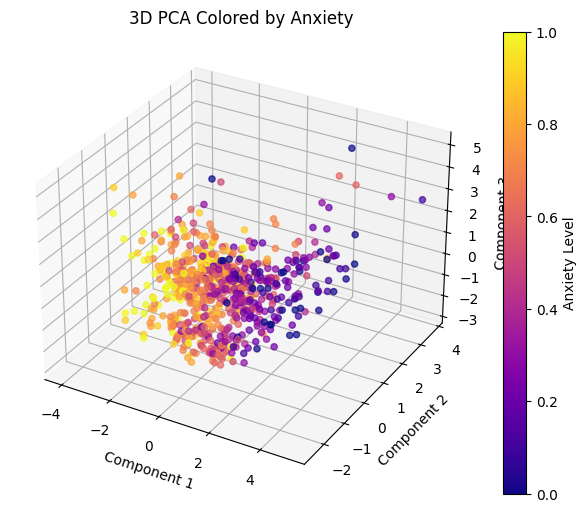

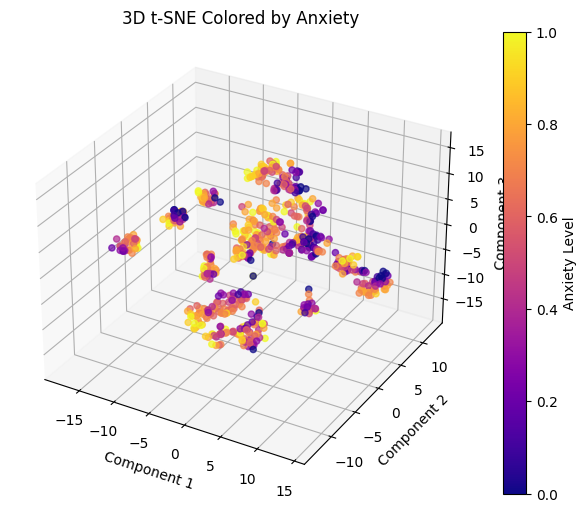

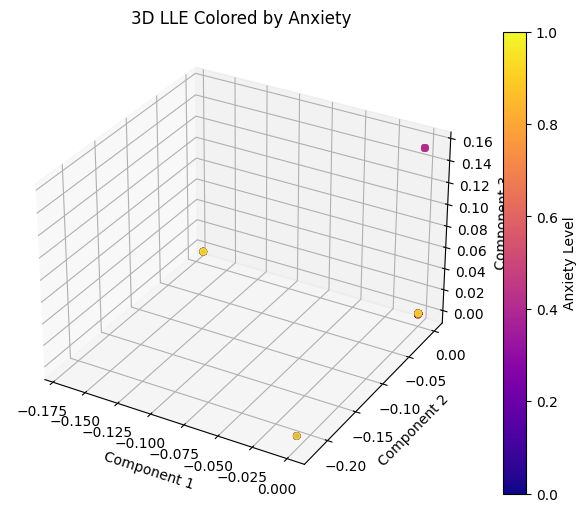

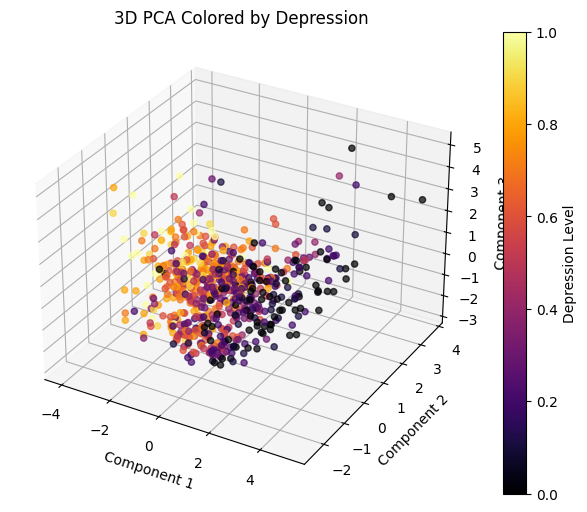

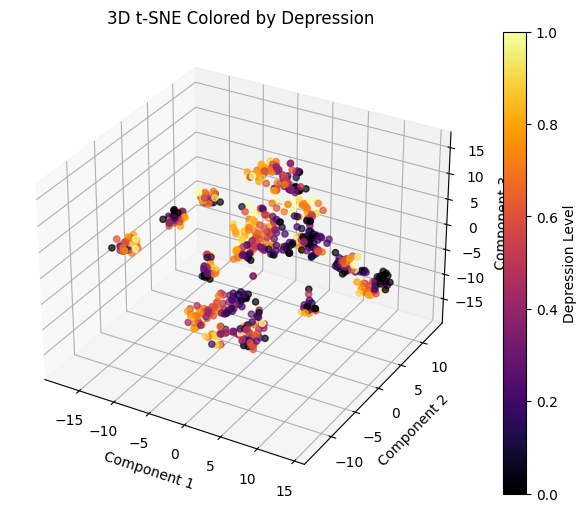

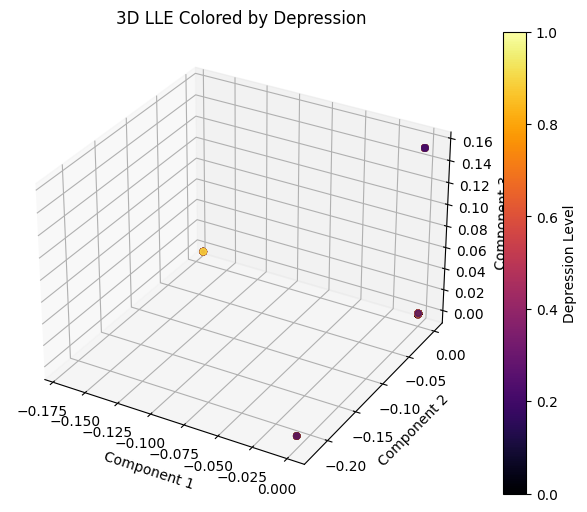

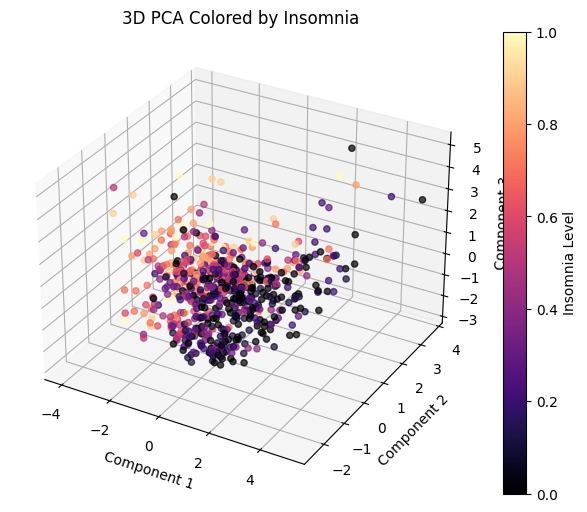

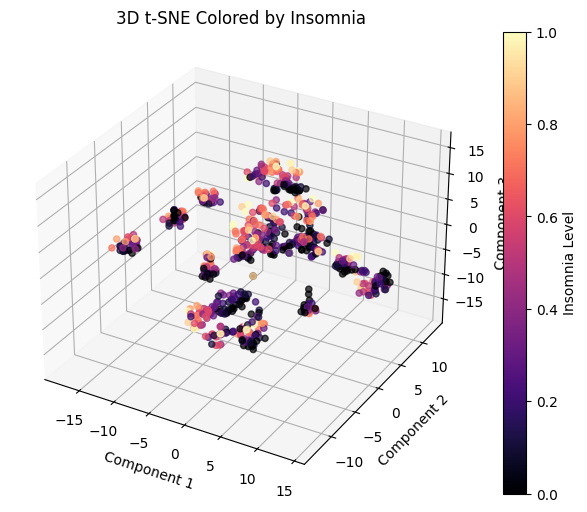

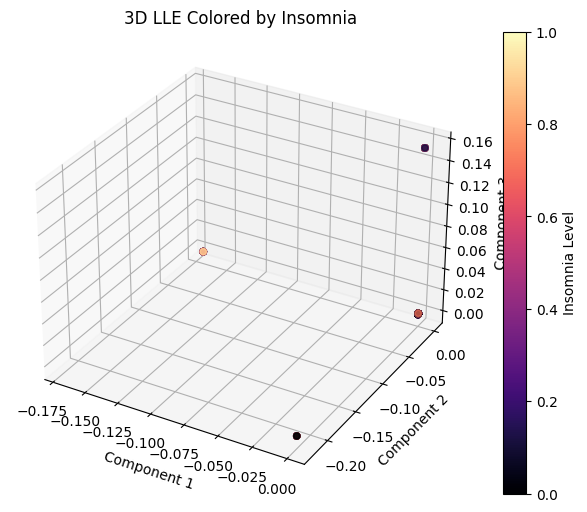

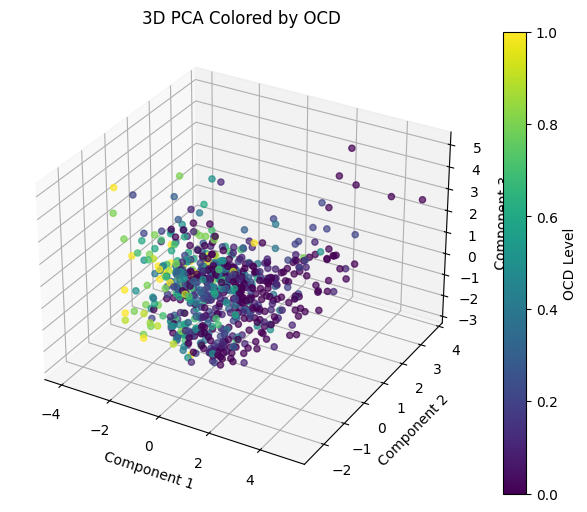

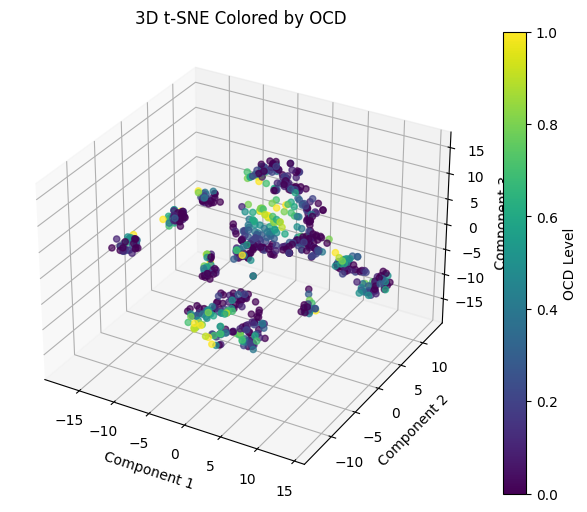

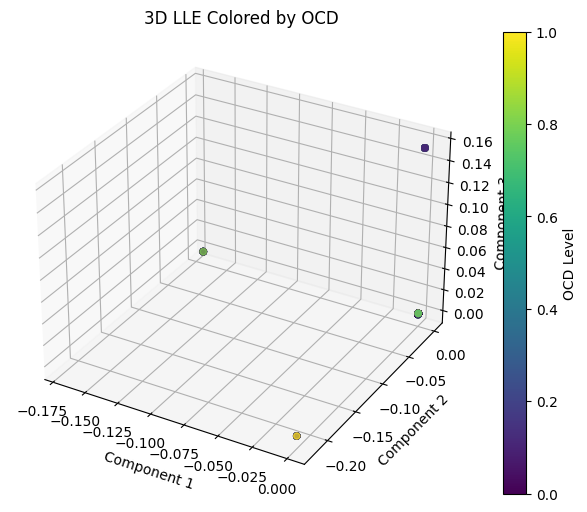

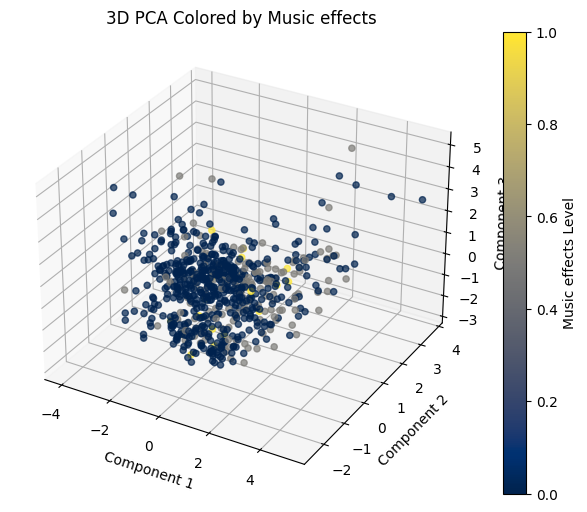

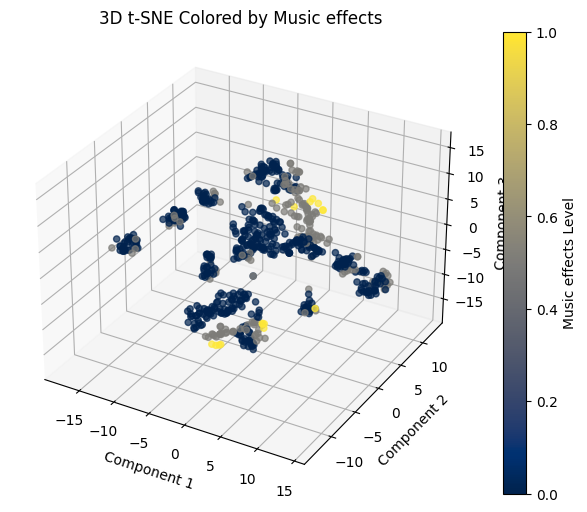

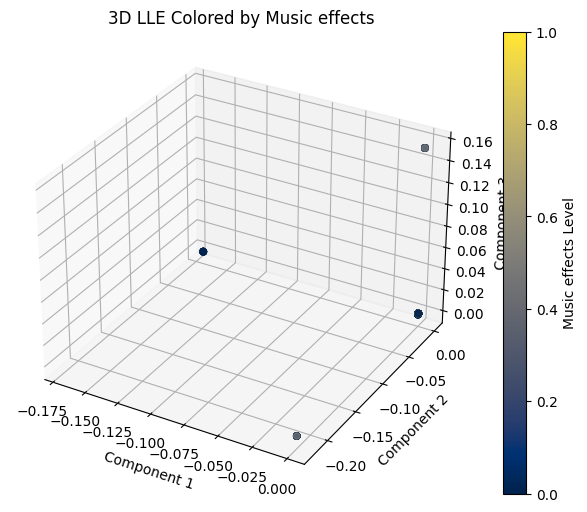

In [25]:
from mpl_toolkits.mplot3d import Axes3D

method_results = [pca_result_3d, tsne_result_3d, lle_result_3d]
method_names = ['PCA', 't-SNE', 'LLE']

health_measures = ['Anxiety', 'Depression', 'Insomnia', 'OCD','Music effects']
normalized_measures = {}
color_maps = ['plasma', 'inferno', 'magma', 'viridis', 'cividis']


for measure in health_measures:
    normalized_measures[measure] = (encoded_df[measure] - encoded_df[measure].min()) / (encoded_df[measure].max() - encoded_df[measure].min())

for measure, cmap in zip(health_measures, color_maps):
    colors = plt.cm.get_cmap(cmap)(normalized_measures[measure])

    for result, method_name in zip(method_results, method_names):
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        sc = ax.scatter(result[:, 0], result[:, 1], result[:, 2], alpha=0.7, c=colors)
        ax.set_title(f'3D {method_name} Colored by {measure}')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        ax.set_zlabel('Component 3')
        fig.colorbar(ScalarMappable(Normalize(0, 1), cmap=cmap), ax=ax, label=f'{measure} Level')
        plt.show()

In [26]:
pca_explained_variance = pca.explained_variance_ratio_.sum()
print(f"pca_explained_variance: {pca_explained_variance}")

pca_explained_variance: 0.21184345852063832


In [27]:
lle_reconstruction_error = lle.reconstruction_error_
print(f"LLE Reconstruction Error: {lle_reconstruction_error}")

LLE Reconstruction Error: 9.820960832374321e-17


The increase in explained variance to around 22% indicates that the first three PCA principal components capture slightly more of the total data variance than the first two components. This remains relatively low, meaning that much of the information contained in the original data is not represented in these three components.

A reconstruction error of almost zero (very close to zero) suggests that the LLE was able to preserve the local structure of the data very precisely during the reduction to three dimensions.

***small study on the effect of music***

The aim was also to see whether or not misic had a positive effect on health, so we added a small study:

In [28]:
music_effects_counts = data_for_manifold['Music effects'].value_counts(normalize=True)

music_effects_mean = data_for_manifold['Music effects'].mean()
music_effects_median = data_for_manifold['Music effects'].median()

music_effects_analysis = {
    'Counts': music_effects_counts.to_dict(),
    'Mean': music_effects_mean,
    'Median': music_effects_median
}

music_effects_analysis


{'Counts': {0.0: 0.7454289732770746,
  1.0: 0.23066104078762306,
  2.0: 0.02390998593530239},
 'Mean': 0.27848101265822783,
 'Median': 0.0}

- Distribution of values:

> 74.54% of participants reported a score of 0, indicating that they perceive an improvement due to the music.

> 23.07% of participants reported a score of 1, indicating that they perceive no effect from the music.

> 2.39% of participants reported a score of 2, which could indicate a worsening of their condition due to the music or some other non-beneficial effect.

- Central tendency:
The mean score is 0.28, which is closer to 0 (improvement) than to 1 (no effect), indicating a general trend towards improvement.
The median score is 0, confirming that half the participants reported an improvement.

- These results suggest that a significant majority of study participants perceive a positive effect of music on their well-being. With the mean and median closer to 0, this reinforces the idea that music has a good effect overall, according to the data collected.

### **3-4. Apply an external validation process (classification and/or regression) to choose the best method. / Explain the model and why it works best for this problem/dataset. Use Python with matplotlib and/or KNIME to plot the dataset and the knowledge extracted from it. Explain the knowledge you extracted.**

In [29]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import numpy as np


In this context, the classification model **predicts the effect of music on individuals**, in particular the variable 'Music effects'.

***Dimensionality 2D reduction methods***

In [30]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, data_for_manifold['Music effects'], test_size=0.2, random_state=42)

pca = PCA(n_components=2)
tsne = TSNE(n_components=2, random_state=42, learning_rate='auto', init='random')
lle = LocallyLinearEmbedding(n_components=2, random_state=42)


In [31]:
pca_result_train_2D = pca.fit_transform(X_train)
tsne_result_train_2D = tsne.fit_transform(X_train)
lle_result_train_2D = lle.fit_transform(X_train)

pca_result_test_2D = pca.transform(X_test)
tsne_result_test_2D = tsne.fit_transform(X_test)
lle_result_test_2D = lle.transform(X_test)

Classification using the reduced dimensions from PCA, t-SNE, and LLE

In [32]:
clf = RandomForestClassifier(random_state=42)

clf.fit(pca_result_train_2D, y_train)
y_pred_pca_2D = clf.predict(pca_result_test_2D)
accuracy_pca = accuracy_score(y_test, y_pred_pca_2D)

clf.fit(tsne_result_train_2D, y_train)
y_pred_tsne_2D = clf.predict(tsne_result_test_2D)
accuracy_tsne = accuracy_score(y_test, y_pred_tsne_2D)

clf.fit(lle_result_train_2D, y_train)
y_pred_lle_2D = clf.predict(lle_result_test_2D)
accuracy_lle = accuracy_score(y_test, y_pred_lle_2D)

In [33]:
accuracies = {'PCA': accuracy_pca, 't-SNE': accuracy_tsne, 'LLE': accuracy_lle}

accuracies


{'PCA': 0.7482517482517482,
 't-SNE': 0.6573426573426573,
 'LLE': 0.6503496503496503}

We obtain better results when using the PCA with the random forest. So we wanted to see the distribution of the data :

<ipython-input-34-de9b59ce389c>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('plasma')(y_test)


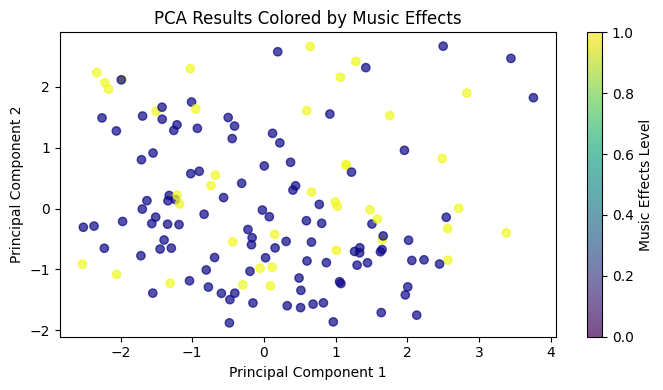

In [34]:
colors = plt.cm.get_cmap('plasma')(y_test)

plt.figure(figsize=(7, 4))
sc = plt.scatter(pca_result_test_2D[:, 0], pca_result_test_2D[:, 1], alpha=0.7, c=colors)
plt.title('PCA Results Colored by Music Effects')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


cbar = plt.colorbar(sc)
cbar.set_label('Music Effects Level')
plt.tight_layout()
plt.show()


***Dimensionality 3D reduction methods***

In [35]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, data_for_manifold['Music effects'], test_size=0.2, random_state=42)

pca = PCA(n_components=3)
tsne = TSNE(n_components=3, random_state=42, learning_rate='auto', init='random')
lle = LocallyLinearEmbedding(n_components=3, random_state=42)

pca_result_train_3D = pca.fit_transform(X_train)
tsne_result_train_3D = tsne.fit_transform(X_train)
lle_result_train_3D = lle.fit_transform(X_train)

pca_result_test_3D = pca.transform(X_test)
tsne_result_test_3D = tsne.fit_transform(X_test)
lle_result_test_3D = lle.transform(X_test)

#Classification using the reduced dimensions from PCA, t-SNE, and LLE
clf = RandomForestClassifier(random_state=42)

clf.fit(pca_result_train_3D, y_train)
y_pred_pca_3D = clf.predict(pca_result_test_3D)
accuracy_pca = accuracy_score(y_test, y_pred_pca_3D)

clf.fit(tsne_result_train_3D, y_train)
y_pred_tsne_3D = clf.predict(tsne_result_test_3D)
accuracy_tsne = accuracy_score(y_test, y_pred_tsne_3D)

clf.fit(lle_result_train_3D, y_train)
y_pred_lle_3D = clf.predict(lle_result_test_3D)
accuracy_lle = accuracy_score(y_test, y_pred_lle_3D)

accuracies = {'PCA': accuracy_pca, 't-SNE': accuracy_tsne, 'LLE': accuracy_lle}

accuracies


{'PCA': 0.7132867132867133,
 't-SNE': 0.4195804195804196,
 'LLE': 0.6433566433566433}

Here we see that the best results are obtained with the 3d dimensiality reduction using the PCA method, with a score of 74%. So, when classifying the effects of music on mental health, the model correctly predicted the effect 74% of the time in the test set.

<ipython-input-36-a0c1ae768b90>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('plasma')(y_test)


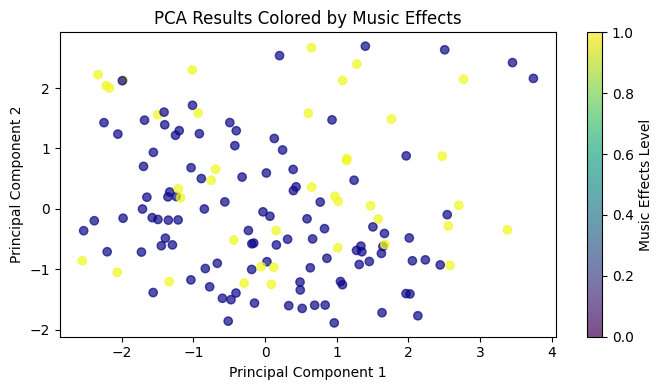

In [36]:
colors = plt.cm.get_cmap('plasma')(y_test)

plt.figure(figsize=(7, 4))
sc = plt.scatter(pca_result_test_3D[:, 0], pca_result_test_3D[:, 1], alpha=0.7, c=colors)
plt.title('PCA Results Colored by Music Effects')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


cbar = plt.colorbar(sc)
cbar.set_label('Music Effects Level')
plt.tight_layout()
plt.show()


In this context, the classification model **predicts mental health**.

Here we had to use a model with several outputs

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


In [38]:
encoded_df = encoded_df.drop(['Timestamp'], axis=1)


In [39]:
X = encoded_df.drop(['Anxiety', 'Depression', 'Insomnia', 'OCD'], axis=1)
Y = encoded_df[['Anxiety', 'Depression', 'Insomnia', 'OCD']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


***Dimensionality 2D reduction methods***

In [40]:
pca = PCA(n_components=2)
X_train_pca_2D = pca.fit_transform(X_train)
X_test_pca_2D = pca.transform(X_test)

lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_train_lle_2D = lle.fit_transform(X_train)
X_test_lle_2D = lle.transform(X_test)

In [41]:
model_pca = MultiOutputRegressor(Ridge()).fit(X_train_pca_2D, y_train)
model_lle = MultiOutputRegressor(Ridge()).fit(X_train_lle_2D, y_train)


In [42]:
y_pred_pca_2D = model_pca.predict(X_test_pca_2D)
y_pred_lle_2D = model_lle.predict(X_test_lle_2D)

mse_pca = mean_squared_error(y_test, y_pred_pca_2D, multioutput='raw_values')
mse_lle = mean_squared_error(y_test, y_pred_lle_2D, multioutput='raw_values')


In [43]:
y_pred_pca_2D = model_pca.predict(X_test_pca_2D)
y_pred_lle_2D = model_lle.predict(X_test_lle_2D)

mse_pca = mean_squared_error(y_test, y_pred_pca_2D, multioutput='raw_values')
mse_lle = mean_squared_error(y_test, y_pred_lle_2D, multioutput='raw_values')


In [44]:
print('PCA Mean Squared Error:', mse_pca)
print('LLE Mean Squared Error:', mse_lle)

PCA Mean Squared Error: [8.58506158 9.94874253 9.62518291 9.04115959]
LLE Mean Squared Error: [8.68130148 9.78526761 9.77125012 9.06092936]


In [45]:
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne_2D = tsne.fit_transform(X_train)
model_tsne = MultiOutputRegressor(Ridge()).fit(X_train_tsne_2D, y_train)
X_test_tsne_2D = tsne.fit_transform(X_test)
y_pred_tsne_2D = model_tsne.predict(X_test_tsne_2D)
mse_tsne = mean_squared_error(y_test, y_pred_tsne_2D, multioutput='raw_values')
print('t-SNE Mean Squared Error:', mse_tsne)

t-SNE Mean Squared Error: [8.678939   9.81594335 9.79864754 9.2089228 ]


The PCA, LLE, T-SNE models performed comparably, but the PCA performed slightly better than the LLE and T-SNE in terms of MSE in this specific dataset.

***Dimensionality 3D reduction methods***

In [46]:
pca = PCA(n_components=3)
X_train_pca_3D = pca.fit_transform(X_train)
X_test_pca_3D = pca.transform(X_test)

lle = LocallyLinearEmbedding(n_components=3, random_state=42)
X_train_lle_3D = lle.fit_transform(X_train)
X_test_lle_3D = lle.transform(X_test)

Here we had to train a multi-output regression model

In [47]:
model_pca = MultiOutputRegressor(Ridge()).fit(X_train_pca_3D, y_train)
model_lle = MultiOutputRegressor(Ridge()).fit(X_train_lle_3D, y_train)


In [48]:
y_pred_pca_3D = model_pca.predict(X_test_pca_3D)
y_pred_lle_3D = model_lle.predict(X_test_lle_3D)

mse_pca = mean_squared_error(y_test, y_pred_pca_3D, multioutput='raw_values')
mse_lle = mean_squared_error(y_test, y_pred_lle_3D, multioutput='raw_values')


In [49]:
print('PCA Mean Squared Error:', mse_pca)
print('LLE Mean Squared Error:', mse_lle)

PCA Mean Squared Error: [8.1911969  9.8133307  9.62923381 9.12877982]
LLE Mean Squared Error: [8.63618971 9.84248968 9.77085522 9.07844493]


The PCA and LLE models performed comparably, but the PCA performed slightly better than the LLE in terms of MSE in this specific dataset.

In [50]:
tsne = TSNE(n_components=3, random_state=42)
X_train_tsne_3D = tsne.fit_transform(X_train)
model_tsne = MultiOutputRegressor(Ridge()).fit(X_train_tsne_3D, y_train)
X_test_tsne_3D = tsne.fit_transform(X_test)
y_pred_tsne_3D = model_tsne.predict(X_test_tsne_3D)
mse_tsne = mean_squared_error(y_test, y_pred_tsne_3D, multioutput='raw_values')
print('t-SNE Mean Squared Error:', mse_tsne)

t-SNE Mean Squared Error: [154.31662983 114.36660815  21.43585645 103.22967149]


And the t-SNE gives very poor results

**So to conclude, the best model that gives the best result is with PCA dimensionality reduction**

In the end, we noticed that PCA gave us the best results with the random forest model. This made us a little confused at first, because in view of previous analyses, we noticed that PCA didn't necessarily give the best distribution/representation of points in clusters, while tsne and lle gave a better distribution, which implied (perhaps) better results with the latter two. So we tried to find the reasons for this in order to understand things in greater depth:

*   Good visual separation doesn't always guarantee good classification performance, and vice versa. PCA tends to preserve the overall variance of the data, which can help maximize the separation between classes for classification, even if this doesn't translate into clear separation in the visualization.
*   PCA is a linear technique that may work best when class separation is linearly achievable in feature space. Whereas t-SNE and LLE are non-linear techniques that seek to preserve local structures in the data. However, these techniques can sometimes exaggerate clusters or discontinuities in the data, which is not always ideal for classification.
*   Regressions are used to predict continuous values, while classification is used to predict discrete categories. The variance-maximizing principal components of PCA may be better suited to capturing trends in continuous data than t-SNE or LLE, which are often used to highlight data structures in a classification context.
*   Regressions can benefit from noise reduction and meaningful feature extraction, which are strengths of PCA. This may explain why PCA works better for MultiOutputRegressor in your case.
*   Regression models can sometimes be more sensitive to data complexity. PCA reduces this complexity by retaining only those components that explain the majority of the variance, which can simplify the problem for the regression model.










### **5.Analyse how the projection results can be improved and propose some solutions related to the dataset you analyse.**

In [51]:
from sklearn.model_selection import  GridSearchCV, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(normalized_data, data_for_manifold['Music effects'], test_size=0.2, random_state=42)


This code will calculate the explained variance for each principal component and accumulate it. The graph will show us how many components are needed to explain a certain percentage of the total variance in the data. The vertical red line indicates the point at which the 95% threshold of explained variance is reached.

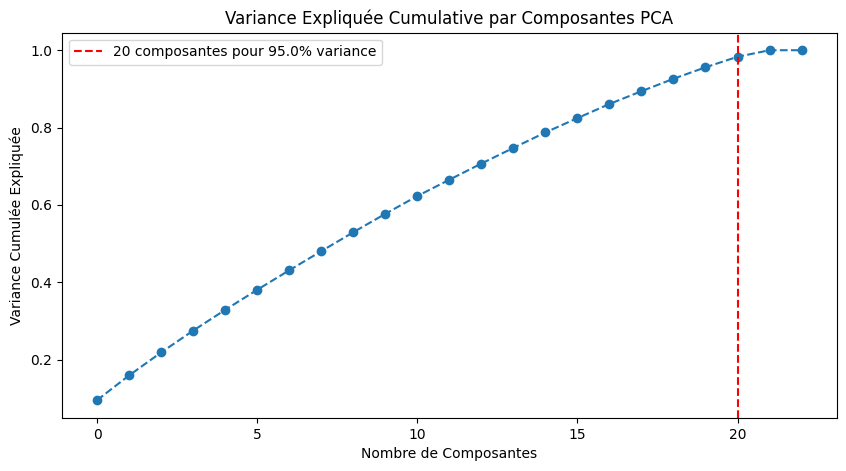

Nombre de composantes nécessaires pour atteindre 95.0% de la variance expliquée : 20


In [52]:
pca = PCA(n_components=len(X_train[0]))
pca.fit(X_train)


explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)


plt.figure(figsize=(10, 5))
plt.plot(explained_variance_ratio_cumsum, marker='o', linestyle='--')
plt.title('Variance Expliquée Cumulative par Composantes PCA')
plt.xlabel('Nombre de Composantes')
plt.ylabel('Variance Cumulée Expliquée')


threshold = 0.95
components_required = np.argmax(explained_variance_ratio_cumsum >= threshold) + 1
plt.axvline(components_required, color='r', linestyle='--', label=f'{components_required} composantes pour {threshold*100}% variance')
plt.legend()

plt.show()

print(f'Nombre de composantes nécessaires pour atteindre {threshold*100}% de la variance expliquée : {components_required}')


In [53]:
pca = PCA(n_components=20)
pca_result_train_n = pca.fit_transform(X_train)
pca_result_test_n = pca.transform(X_test)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(pca_result_train_n, y_train)


best_clf = grid_search.best_estimator_

accuracy = cross_val_score(best_clf, pca_result_test_n, y_test, cv=5, scoring='accuracy').mean()

print(f'Best Random Forest parameters: {grid_search.best_params_}')
print(f'Cross-validated accuracy: {accuracy}')

Best Random Forest parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Cross-validated accuracy: 0.8953201970443351


In addition, GridSearchCV is used for an exhaustive search of the best hyperparameters for the Random Forest classifier, and cross_val_score for cross-validation to reliably assess model accuracy. We end up with a score of 0.90%.